In [ ]:
#라이브러리 import
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#keras에서 지원하는 mnist 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#데이터 정보
print("학습 데이터       ", x_train.shape) #(데이터갯수, 픽셀수, 픽셀수)
print("학습데이터 라벨   ", y_train.shape) #(데이터의라벨)
print("테스트 데이터     ", x_test.shape)  #(데이터갯수, 픽셀수, 픽셀수)
print("테스트 데이터 라벨",y_test.shape)   #(데이터의라벨)

11490434/11490434 [==============================] - 1s 0us/step
학습 데이터        (60000, 28, 28)
학습데이터 라벨    (60000,)
테스트 데이터      (10000, 28, 28)
테스트 데이터 라벨 (10000,)


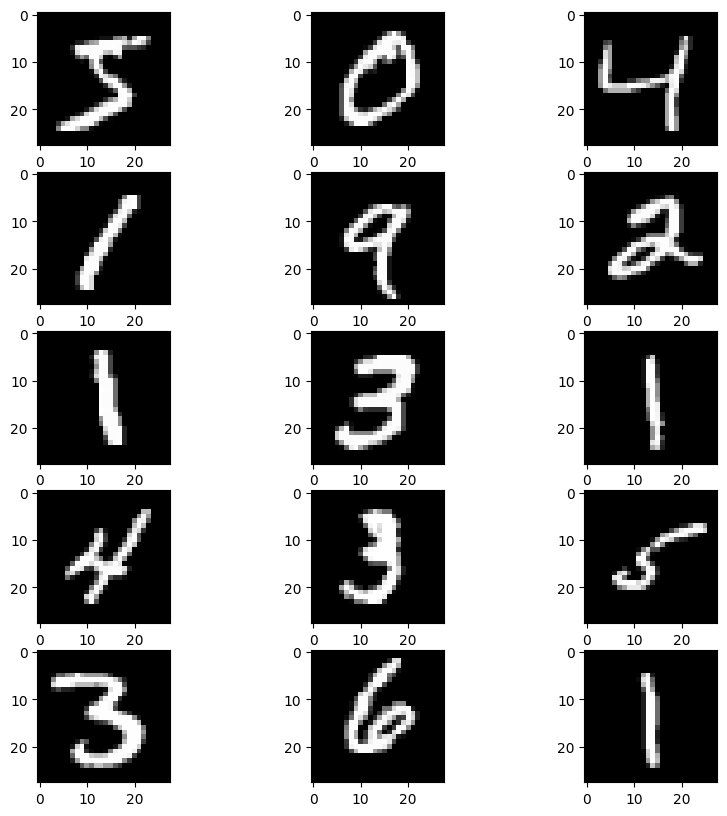


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [ ]:
#데이터 시각화
plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1

plt.show()

#각 이미지의 라벨데이터 확인
print()
print(y_train[:15])

In [ ]:
#학습 설정
number = 10 #라벨의 총 갯수
epoch = 5   #학습 횟수

# 모델 레이어 설정
# Conv, Pooling 있음
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델의 모습을 표로 출력
model.summary()

# 위의 레이어를 가진 모델로 학습시킴
print(model.fit(x_train, y_train, epochs=epoch))

# 테스트 데이터로 검증을 해봄
print()
print(model.evaluate(x_test, y_test))#로스값 ,정확도
print("[loss                 accuracy          ]")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 15488)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
# 파일 업로드 기능 실행
from google.colab import files
uploaded = files.upload()

# 업로드된 파일 정보 출력
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving myNum.jpg to myNum (1).jpg
User uploaded file "myNum (1).jpg" with length 24149 bytes


(28, 28)


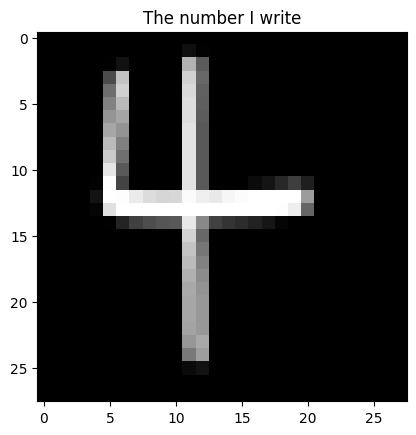

In [ ]:
#불러온 이미지 전처리 및 시각화
src = cv2.imread('./myNum.jpg', cv2.IMREAD_GRAYSCALE)
ret , binary = cv2.threshold(src,170,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.title('The number I write')
plt.imshow(myNum, cmap='gray')
print(myNum.shape)

In [ ]:
#불러온 이미지 모델에 적용
categoris = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(np.argmax(model.predict(myNum.reshape(-1, 28, 28, 1))[0]))

1/1 [==============================] - 0s 202ms/step
4


313/313 [==============================] - 1s 3ms/step


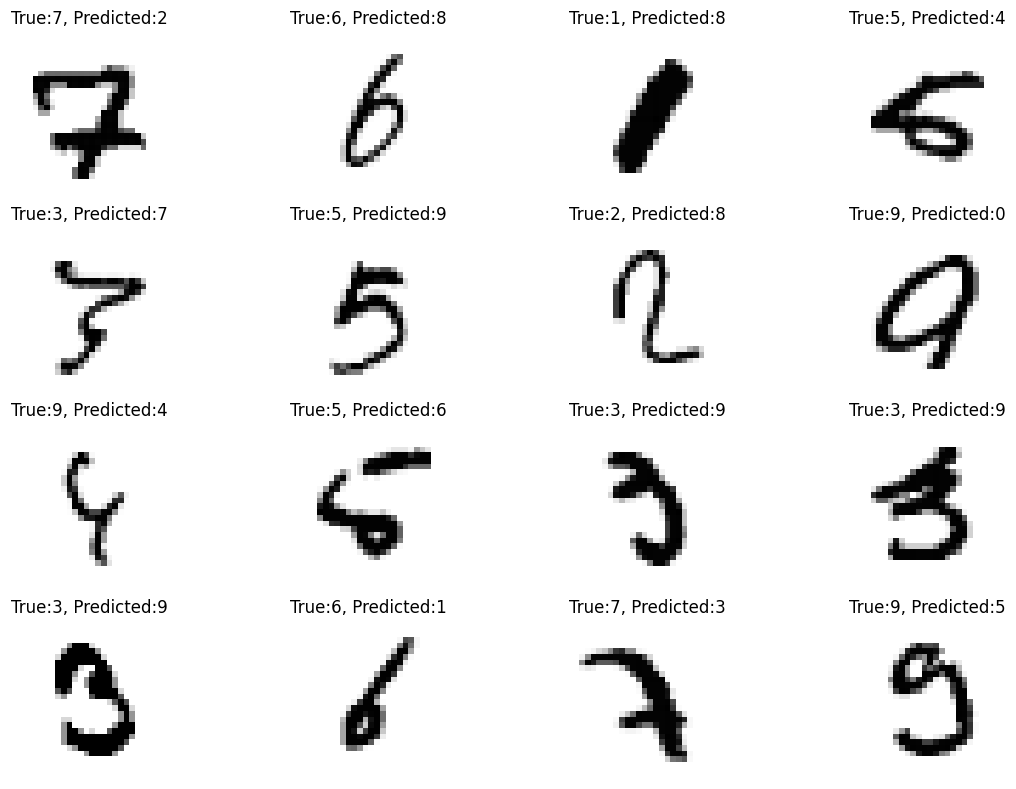

In [ ]:
# 테스트 세트에 대한 레이블 예측
predicted_labels = np.argmax(model.predict(x_test), axis=1)

# 잘못 분류된 샘플의 인덱스 찾기
misclassified_indices = np.where(predicted_labels != y_test)[0]

# 16개의 잘못 분류된 이미지를 랜덤하게 선택하여 표시
samples = random.choices(population=misclassified_indices, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12, 8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
    plt.title(f"True:{y_test[n]}, Predicted:{predicted_labels[n]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
